# Product data EDA

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
import os
from dotenv import load_dotenv

In [3]:
os.chdir('..')

In [4]:
from src.data_ingestion.data_ingestion import read_csv_data_from_hadoop
from src.utils.data_preprocessing import  is_missing_value , remove_missing_values, find_missing_values, find_outlier_box_plot ,find_outliers_IQR , remove_missing_values , remove_outliers , count_missing_values_per_column

In [5]:
load_dotenv()
hadoop_raw_data_path = os.getenv('hadoop_raw_data_path')
product_data_path = '/product.csv'
path = hadoop_raw_data_path + product_data_path

In [6]:
#laod data from hadoop 
data = read_csv_data_from_hadoop(hadoop_data_directory=path)

In [7]:
data.show(5)

+-----+------+--------------+-----------+-----------+----------+------+----+------+--------------------+
|   id|gender|masterCategory|subCategory|articleType|baseColour|season|year| usage|  productDisplayName|
+-----+------+--------------+-----------+-----------+----------+------+----+------+--------------------+
|15970|   Men|       Apparel|    Topwear|     Shirts| Navy Blue|  Fall|2011|Casual|Turtle Check Men ...|
|39386|   Men|       Apparel| Bottomwear|      Jeans|      Blue|Summer|2012|Casual|Peter England Men...|
|59263| Women|   Accessories|    Watches|    Watches|    Silver|Winter|2016|Casual|Titan Women Silve...|
|21379|   Men|       Apparel| Bottomwear|Track Pants|     Black|  Fall|2011|Casual|Manchester United...|
|53759|   Men|       Apparel|    Topwear|    Tshirts|      Grey|Summer|2012|Casual|Puma Men Grey T-s...|
+-----+------+--------------+-----------+-----------+----------+------+----+------+--------------------+
only showing top 5 rows



In [8]:
df = pd.DataFrame(data.take(data.count()), columns=data.columns)
df.head(5)

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016.0,Casual,Titan Women Silver Watch
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Manchester United Men Solid Black Track Pants
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.0,Casual,Puma Men Grey T-shirt


In [9]:
df.shape

(44446, 10)

In [10]:
#check if missing values exist in the dataset
is_missing_value(df)


np.True_

In [12]:
# count column missing values
count_missing_values_per_column(df)

id                     0
gender                 0
masterCategory         0
subCategory            0
articleType            0
baseColour             0
season                21
year                   1
usage                  1
productDisplayName     0
dtype: int64

In [18]:
# drop missing values 
df = remove_missing_values(df)


In [20]:
df.dtypes


id                      int64
gender                 object
masterCategory         object
subCategory            object
articleType            object
baseColour             object
season                 object
year                  float64
usage                  object
productDisplayName     object
dtype: object

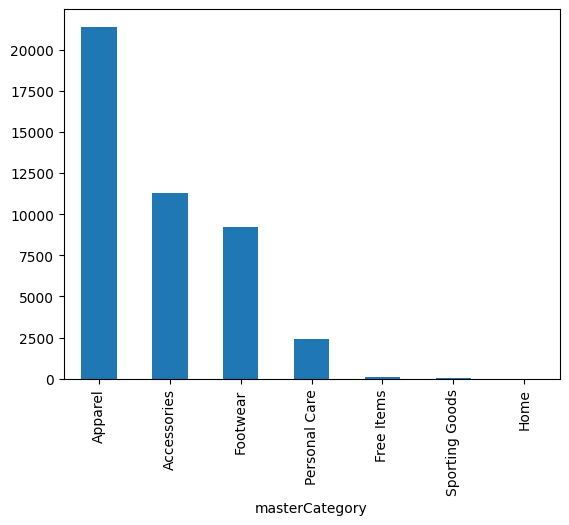

In [15]:
# plot bar chart for product category
df['masterCategory'].value_counts().plot(kind='bar')
plt.show()

In [16]:
# aggregate data by master category
master_category_aggregate = df.groupby('masterCategory').agg(
    subCategory_count=('subCategory', 'nunique'),
    subCategory_list=('subCategory', lambda x: list(x.unique()))

).reset_index()
master_category_aggregate

,masterCategory,subCategory_count,subCategory_list
0,Accessories,20,"[Watches, Socks, Belts, Bags, Shoe Accessories..."
1,Apparel,8,"[Topwear, Bottomwear, Innerwear, Saree, Dress,..."
2,Footwear,3,"[Shoes, Flip Flops, Sandal]"
3,Free Items,2,"[Free Gifts, Vouchers]"
4,Home,1,[Home Furnishing]
5,Personal Care,11,"[Fragrance, Lips, Nails, Skin Care, Makeup, Sk..."
6,Sporting Goods,2,"[Sports Equipment, Wristbands]"


In [21]:
# aggregate by usage
usage_aggregate = df.groupby('usage').agg(
    subCategory_count=('subCategory', 'nunique'),
    subCategory_list=('subCategory', lambda x: list(x.unique()))

).reset_index()
usage_aggregate

,usage,subCategory_count,subCategory_list
0,Casual,43,"[Topwear, Bottomwear, Watches, Socks, Shoes, B..."
1,Ethnic,12,"[Topwear, Saree, Apparel Set, Jewellery, Botto..."
2,Formal,14,"[Topwear, Shoes, Belts, Bottomwear, Ties, Free..."
3,Home,1,[Home Furnishing]
4,NA,16,"[Nails, Topwear, Lips, Loungewear and Nightwea..."
5,Party,8,"[Dress, Bags, Shoes, Topwear, Free Gifts, Watc..."
6,Smart Casual,9,"[Topwear, Bottomwear, Shoes, Dress, Watches, W..."
7,Sports,19,"[Topwear, Shoes, Bottomwear, Bags, Watches, He..."
8,Travel,2,"[Bags, Topwear]"


In [ ]:
#aggregate by season 

season_aggregate = df.groupby('season').agg({
    'subCategory': 'nunique',
    # 'subCategory': lambda x: list(x.unique())
}).reset_index()
print(season_aggregate)

   season                                        subCategory
0    Fall  [Topwear, Bottomwear, Flip Flops, Sandal, Belt...
1  Spring  [Fragrance, Lips, Nails, Shoes, Skin Care, Top...
2  Summer  [Bottomwear, Topwear, Socks, Shoes, Belts, Bag...
3  Winter  [Watches, Shoes, Jewellery, Bags, Innerwear, E...


In [ ]:
#